In [1]:
!ls ../data

le01.m4a le04.m4a le07.m4a le10.m4a st03.m4a st06.m4a st09.m4a
le02.m4a le05.m4a le08.m4a st01.m4a st04.m4a st07.m4a st10.m4a
le03.m4a le06.m4a le09.m4a st02.m4a st05.m4a st08.m4a


In [2]:
from pydub import AudioSegment
import matplotlib.pyplot as plt

st01 = AudioSegment.from_file('../data/st01.m4a', 'm4a')

In [3]:
import numpy as np
st01_sample = np.array(st01.get_array_of_samples())

In [4]:
st01_sample.shape

(363744,)

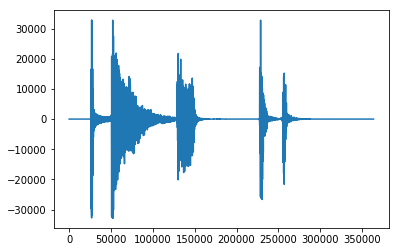

In [5]:
plt.plot(st01_sample)

In [6]:
st01_sample.max(), st01_sample.min()

(32767, -32768)

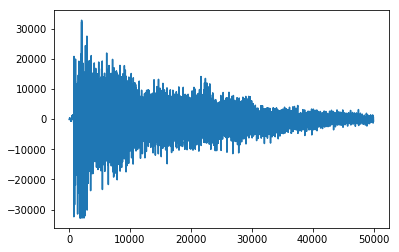

In [10]:
plt.plot(st01_sample[50000: 100000])

In [8]:
st01_sample = st01_sample[50000: 100000]

In [9]:
st01_sample.shape

(50000,)

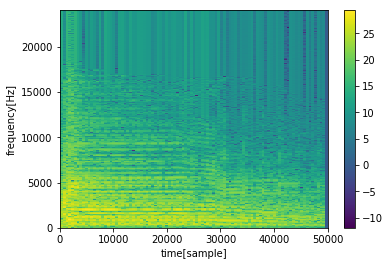

In [10]:
%matplotlib inline
data = st01_sample
sampling_rate = 48000
NFFT = 1024 
OVERLAP = NFFT / 2 
frame_length = data.shape[0] 
split_number = len(np.arange((NFFT / 2), frame_length, (NFFT - OVERLAP))) 

window = np.hamming(NFFT)  

spec = np.zeros([split_number, NFFT // 4]) 


pos = 0

for fft_index in range(split_number):
    frame = data[int(pos):int(pos+NFFT)]
    if len(frame) == NFFT:
        windowed = window * frame  
        fft_result = np.fft.rfft(windowed)
         
        fft_data2 = np.real(fft_result[:int(len(fft_result)/2)]) 
        fft_data2 = np.log(fft_data2** 2)  

        for i in range(len(spec[fft_index])):
            spec[fft_index][-i-1] = fft_data2[i]

        pos += (NFFT - OVERLAP) 

# プロット
plt.imshow(spec.T, extent=[0, frame_length, 0, sampling_rate/2], aspect="auto")
plt.xlabel("time[sample]")
plt.ylabel("frequency[Hz]")
plt.colorbar()
plt.show()

In [11]:
spec.T.shape

(256, 97)

In [19]:
i = '1'

In [22]:
('_' + i + '.').join(f_name.name.split('.'))

'le02_1.m4a'

In [11]:
# Data loader, processor
%matplotlib inline
import matplotlib.pyplot as plt
import pathlib
from pydub import AudioSegment
import numpy as np

sounds = []
g_class = [] # Stratocaster: 0, Les Paul: 1
f_names = []
datas = []
specs = []

for f_name in pathlib.Path('../data').iterdir():
    
    sounds.append(AudioSegment.from_file('../data/' + f_name.name, 'm4a'))
    g_class.append(int('le' in f_name.name))
    f_names.append(f_name.name)
    datas.append(np.array(AudioSegment.from_file('../data/' + f_name.name, 'm4a').get_array_of_samples()))

    
    data = datas[-1][50000: 100000]
    sampling_rate = 48000
    NFFT = 1024 
    OVERLAP = NFFT / 2 
    frame_length = data.shape[0] 
    split_number = len(np.arange((NFFT / 2), frame_length, (NFFT - OVERLAP))) 

    window = np.hamming(NFFT)  

    spec = np.zeros([split_number, NFFT // 4]) 


    pos = 0

    for fft_index in range(split_number):
        frame = data[int(pos):int(pos+NFFT)]
        if len(frame) == NFFT:
            windowed = window * frame  
            fft_result = np.fft.rfft(windowed)

            fft_data2 = np.real(fft_result[:int(len(fft_result)/2)]) 
            fft_data2 = np.log(fft_data2** 2)  

            for i in range(len(spec[fft_index])):
                spec[fft_index][-i-1] = fft_data2[i]

            pos += (NFFT - OVERLAP)
    
    specs.append(spec.T)


In [13]:
f_names

['le09.m4a',
 'le08.m4a',
 'st09.m4a',
 'st08.m4a',
 'le06.m4a',
 'st05.m4a',
 'st10.m4a',
 'st04.m4a',
 'le07.m4a',
 'le05.m4a',
 'st06.m4a',
 'st07.m4a',
 'le04.m4a',
 'le10.m4a',
 'st03.m4a',
 'st02.m4a',
 'le01.m4a',
 'le03.m4a',
 'st01.m4a',
 'le02.m4a']

In [14]:
g_class

[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]

In [15]:
g_class = np.eye(2)[g_class]
g_class

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [16]:
datas

[array([ 0, -1,  0, ...,  0,  0,  0], dtype=int16),
 array([1, 1, 2, ..., 0, 0, 0], dtype=int16),
 array([7, 7, 4, ..., 0, 0, 0], dtype=int16),
 array([ 0,  0, -3, ..., -2, -1, -2], dtype=int16),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int16),
 array([2, 0, 1, ..., 0, 0, 0], dtype=int16),
 array([ 0,  0, -2, ...,  0,  0,  0], dtype=int16),
 array([-1, -1, -1, ...,  0,  0,  0], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 array([2, 2, 1, ..., 0, 0, 0], dtype=int16),
 array([-4, -5, -4, ...,  0,  0,  0], dtype=int16),
 array([2, 2, 2, ..., 0, 0, 0], dtype=int16),
 array([-7, -7, -9, ...,  0,  0,  0], dtype=int16),
 array([-1,  0, -1, ...,  0,  0,  0], dtype=int16),
 array([12, 12, 12, ...,  0,  0,  0], dtype=int16),
 array([-9, -8, -9, ...,  0,  0,  0], dtype=int16),
 array([-10, -10, -10, ...,   1,  -1,   0], dtype=int16),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int16),
 array([-6, -6, -7, ...,  0,  0,  0], dtype=int16),
 array([3, 4, 3, ..., 0, 0, 0], dtype=int16)]

In [46]:
#specs

In [17]:
for s in specs:
    print(s.shape)

(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)
(256, 97)


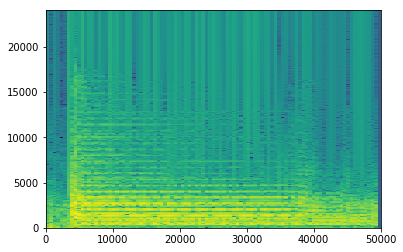

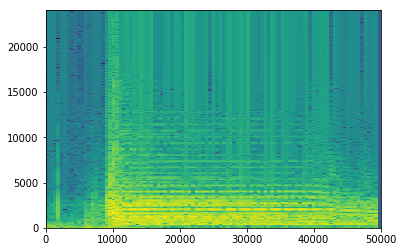

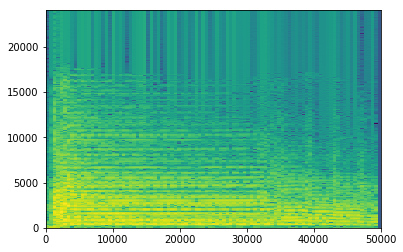

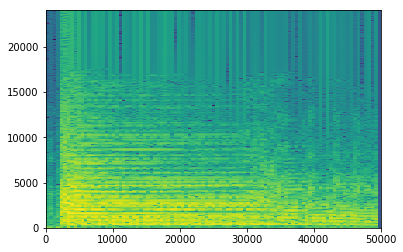

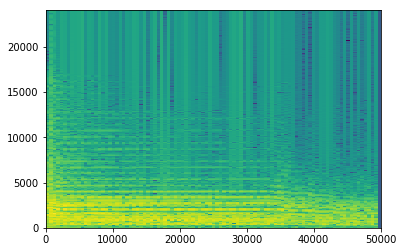

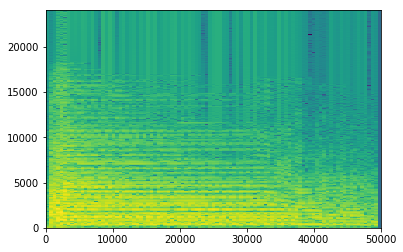

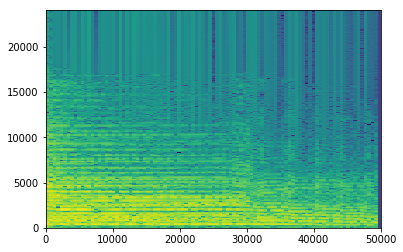

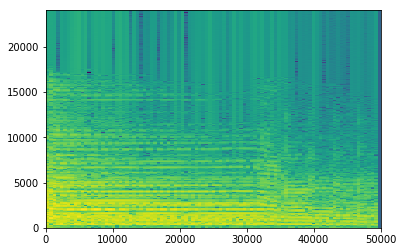

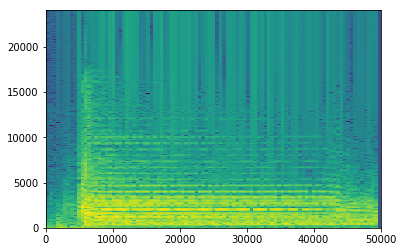

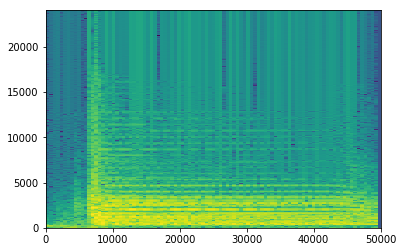

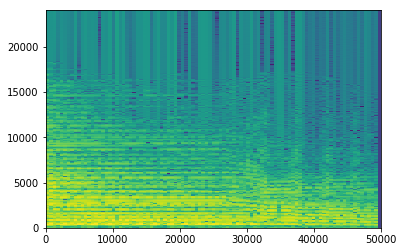

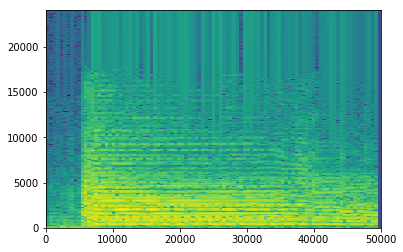

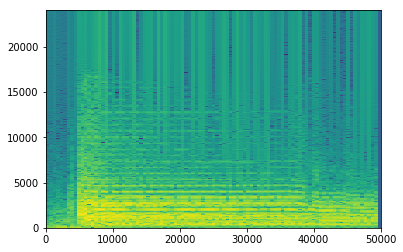

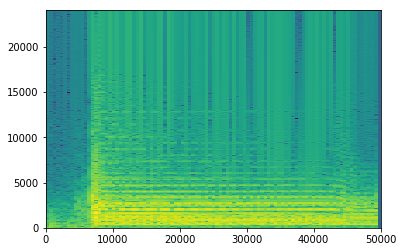

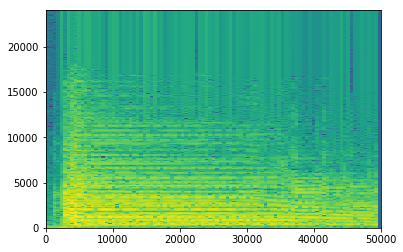

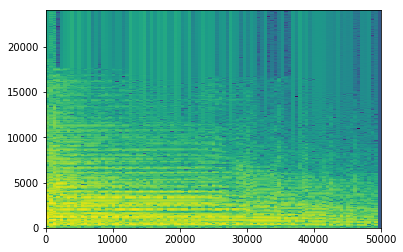

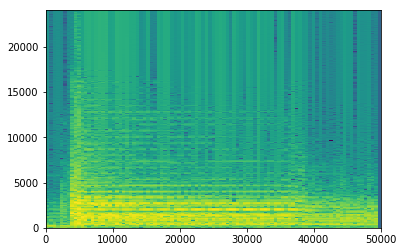

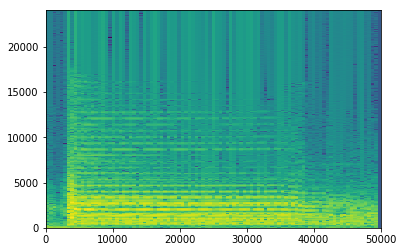

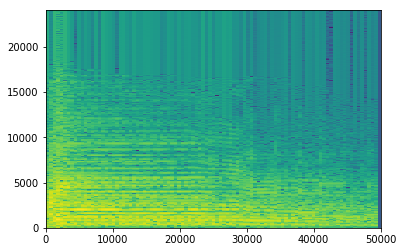

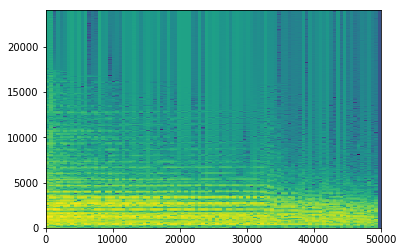

In [18]:
for s in specs:
    plt.imshow(s, extent=[0, frame_length, 0, sampling_rate/2], aspect="auto")
    plt.show()

In [19]:
# Network
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def tf_log(x):
    return tf.log(tf.clip_by_value(x, 1e-10, x))

tf.reset_default_graph()

is_training = tf.placeholder(tf.bool, shape=())

x = tf.placeholder(shape=[None, 256, 97, 1], dtype=tf.float32)
t = tf.placeholder(tf.float32, [None, 2])

h = tf.keras.layers.Conv2D(filters=32, kernel_size= [3, 3])(x) 
h = tf.keras.layers.BatchNormalization()(h, training=is_training)
h = tf.nn.relu(h)
h = tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2)(h) 

h = tf.keras.layers.Conv2D(filters=64, kernel_size= [3, 3])(h) 
h = tf.keras.layers.BatchNormalization()(h, training=is_training)
h = tf.nn.relu(h)
h = tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2)(h) 

h = tf.keras.layers.Conv2D(filters=128, kernel_size= [3, 3])(h) 
h = tf.keras.layers.BatchNormalization()(h, training=is_training)
h = tf.nn.relu(h)
h = tf.keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2)(h) 

h = tf.keras.layers.Flatten()(h)
h = tf.keras.layers.Dense(units=256, activation=tf.nn.relu)(h)
y = tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)(h)

cost = - tf.reduce_mean(tf.reduce_sum(t * tf_log(y), axis = 1))

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.control_dependencies(update_ops):
    optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [20]:
x_train, x_test, t_train, t_test = train_test_split(specs, g_class, test_size = 5)

x_train = np.array(x_train) / np.array(x_train).max()
x_test = np.array(x_test) / np.array(x_test).max()
t_train = np.array(t_train)
t_test = np.array(t_test)


In [112]:
#t_train

In [135]:
# Training

n_epochs = 100
batch_size = 3
n_batches = 5

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(n_epochs):
    x_train, t_train = shuffle(x_train, t_train)
    for batch in range(n_batches):
        start = batch * batch_size
        end = start + batch_size
        sess.run(optimizer, feed_dict={x: x_train[start:end][:, :, :, None], t: t_train[start:end], is_training: True})
    
    if epoch % 1 == 0:
        y_pred, cost_test = sess.run([y, cost], feed_dict={x: x_test[:, :, :, None], t: t_test, is_training: False})
        print('EPOCH: {}, Valid Cost: {:.3f}, Valid Accuracy: {:.3f}'.format(
            epoch,
            cost_test,
            accuracy_score(t_test.argmax(axis=1), y_pred.argmax(axis=1))
        ))
        print(t_test.argmax(axis=1), y_pred.argmax(axis=1))
sess.close()

EPOCH: 0, Valid Cost: 0.696, Valid Accuracy: 0.400
[1 1 1 0 0] [0 0 0 0 0]
EPOCH: 1, Valid Cost: 0.700, Valid Accuracy: 0.400
[1 1 1 0 0] [0 0 0 0 0]
EPOCH: 2, Valid Cost: 0.704, Valid Accuracy: 0.400
[1 1 1 0 0] [0 0 0 0 0]
EPOCH: 3, Valid Cost: 0.705, Valid Accuracy: 0.400
[1 1 1 0 0] [0 0 0 0 0]


KeyboardInterrupt: 

In [78]:
np.array(specs)[:, :, :, None].shape

(20, 256, 97, 1)

In [82]:
x_train[start: end][:, :, :, None]

TypeError: list indices must be integers or slices, not tuple

In [145]:
x_train = np.array(specs) / np.array(specs).max()
t_train = np.array(g_class)

n_epochs = 100
batch_size = 4
n_batches = 5

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(n_epochs):
    x_train, t_train = shuffle(x_train, t_train)
    for batch in range(n_batches):
        start = batch * batch_size
        end = start + batch_size
        sess.run(optimizer, feed_dict={x: x_train[start:end][:, :, :, None], t: t_train[start:end], is_training: True})
    
    if epoch % 1 == 0:
        y_pred, cost_test = sess.run([y, cost], feed_dict={x: x_train[:, :, :, None], t: t_train, is_training: False})
        print('EPOCH: {}, Test Cost: {:.3f}, Test Accuracy: {:.3f}'.format(
            epoch,
            cost_test,
            accuracy_score(t_train.argmax(axis=1), y_pred.argmax(axis=1))
        ))
        print(t_train.argmax(axis=1), y_pred.argmax(axis=1))

saver = tf.train.Saver()
saver.save(sess, './model')
        
sess.close()

EPOCH: 0, Test Cost: 0.692, Test Accuracy: 0.500
[0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
EPOCH: 1, Test Cost: 0.692, Test Accuracy: 0.500
[1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
EPOCH: 2, Test Cost: 0.691, Test Accuracy: 0.650
[0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0] [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
EPOCH: 3, Test Cost: 0.690, Test Accuracy: 0.500
[0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
EPOCH: 4, Test Cost: 0.690, Test Accuracy: 0.500
[1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
EPOCH: 5, Test Cost: 0.689, Test Accuracy: 0.500
[1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
EPOCH: 6, Test Cost: 0.689, Test Accuracy: 0.600
[1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1] [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
EPOCH: 7, Test Cost: 0.689, Test Accuracy: 0.700
[0 1 0 1 0 0 0 1 0 0

RuntimeError: Attempted to use a closed Session.

In [148]:
sess = tf.Session()
saver = tf.train.import_meta_graph('model.meta')
saver.restore(sess, tf.train.latest_checkpoint('./'))

sess.run(y, {x:})

INFO:tensorflow:Restoring parameters from ./model


In [153]:
sess.close()

In [158]:
test1

array([0., 1.])

In [26]:
idx0 = np.random.choice(20)
test1 = g_class[idx0]

test0 = sounds[idx0]
test0

In [27]:
data = np.array(test0.get_array_of_samples())[50000: 100000]
sampling_rate = 48000
NFFT = 1024 
OVERLAP = NFFT / 2 
frame_length = data.shape[0] 
split_number = len(np.arange((NFFT / 2), frame_length, (NFFT - OVERLAP))) 

window = np.hamming(NFFT)  

spec = np.zeros([split_number, NFFT // 4]) 


pos = 0

for fft_index in range(split_number):
    frame = data[int(pos):int(pos+NFFT)]
    if len(frame) == NFFT:
        windowed = window * frame  
        fft_result = np.fft.rfft(windowed)

        fft_data2 = np.real(fft_result[:int(len(fft_result)/2)]) 
        fft_data2 = np.log(fft_data2** 2)  

        for i in range(len(spec[fft_index])):
            spec[fft_index][-i-1] = fft_data2[i]

        pos += (NFFT - OVERLAP)

spec0 = spec.T

sess = tf.Session()
saver = tf.train.import_meta_graph('model.meta')
saver.restore(sess, tf.train.latest_checkpoint('./'))

x_train = np.array(spec0) / np.array(spec0).max()
_y = sess.run(y, feed_dict={x: x_train.reshape([1, 256, 97, 1]), is_training: False})

print('\n\nPrediction: ' + ['Storatocaster', 'LesPaul'][_y.argmax(axis = 1)[0]], str(round(100 * sigmoid(_y.max() - 0.5), 2)) + '% '+ ['Storatocaster', 'LesPaul'][1 - _y.argmax(axis = 1)[0]], str(round(100 - 100 * sigmoid(_y.max() - 0.5), 2)) + '%')
print('Answer: ' + ['Storatocaster', 'LesPaul'][test1.argmax()])

sess.close()

INFO:tensorflow:Restoring parameters from ./model


Prediction: LesPaul 94.95% Storatocaster 5.05%
Answer: LesPaul


In [24]:
x_train[:,:,None].shape

(256, 97, 1)

In [179]:
_y.max()

0.50173926

In [23]:
import math
def sigmoid(x):
    x = x * 500
    return 1 / (1 + math.e ** - x)

In [252]:
_y.max()

0.50460726

In [257]:
sigmoid(0.02)

0.7310585786300049